In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from src.clustering.kmeans import KMeans_Scratch
from src.metrics.internal import (
    calinski_harabasz_score_scratch,
    davies_bouldin_score_scratch,
    silhouette_score_scratch,
    calculate_wcss
)
from src.metrics.external import confusion_matrix_scratch,purity_score_scratch,entropy_scratch,normalized_mutual_information_scratch,adjusted_rand_index_scratch

 


In [5]:
import pandas as pd

df=pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\K_means-GMM\data.csv')

In [6]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [9]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df.drop(columns=['id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum().sum()

np.int64(0)

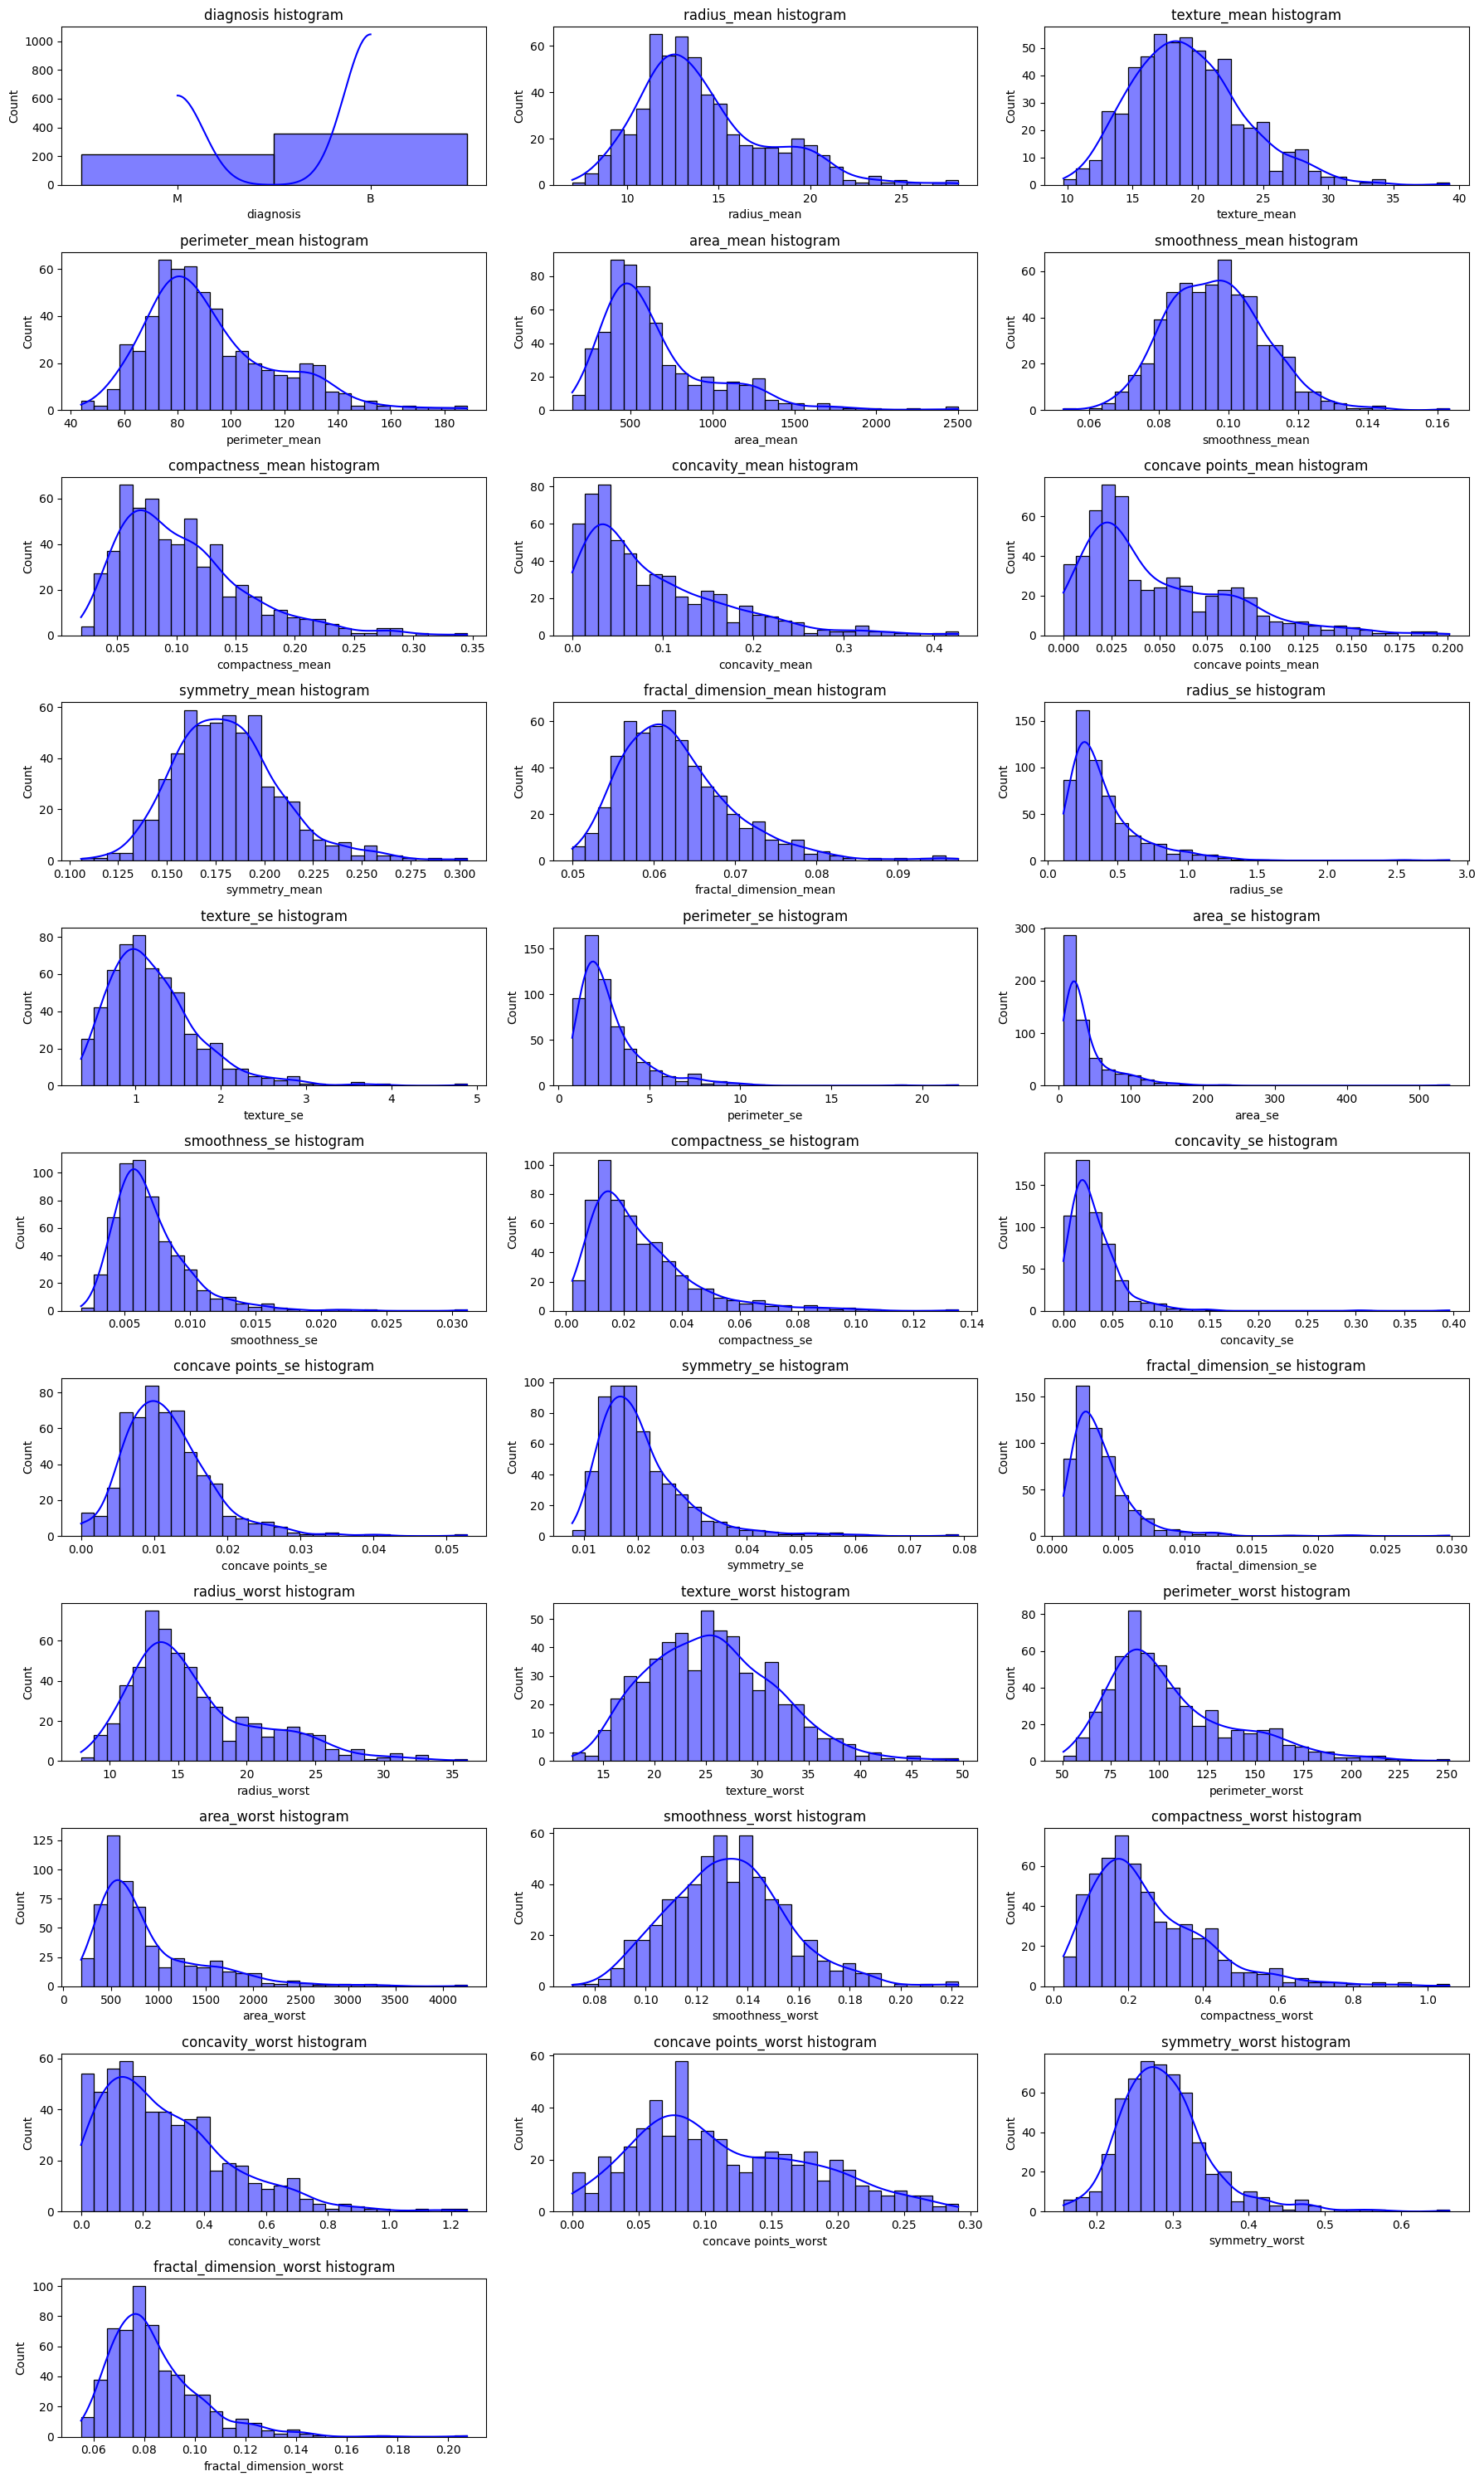

In [13]:
plt.figure(figsize=(18, 30))

for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.histplot(x=bf, data=df, kde=True, color='blue', bins=30)

    plt.title(f'{bf} histogram')
plt.tight_layout()
plt.show()

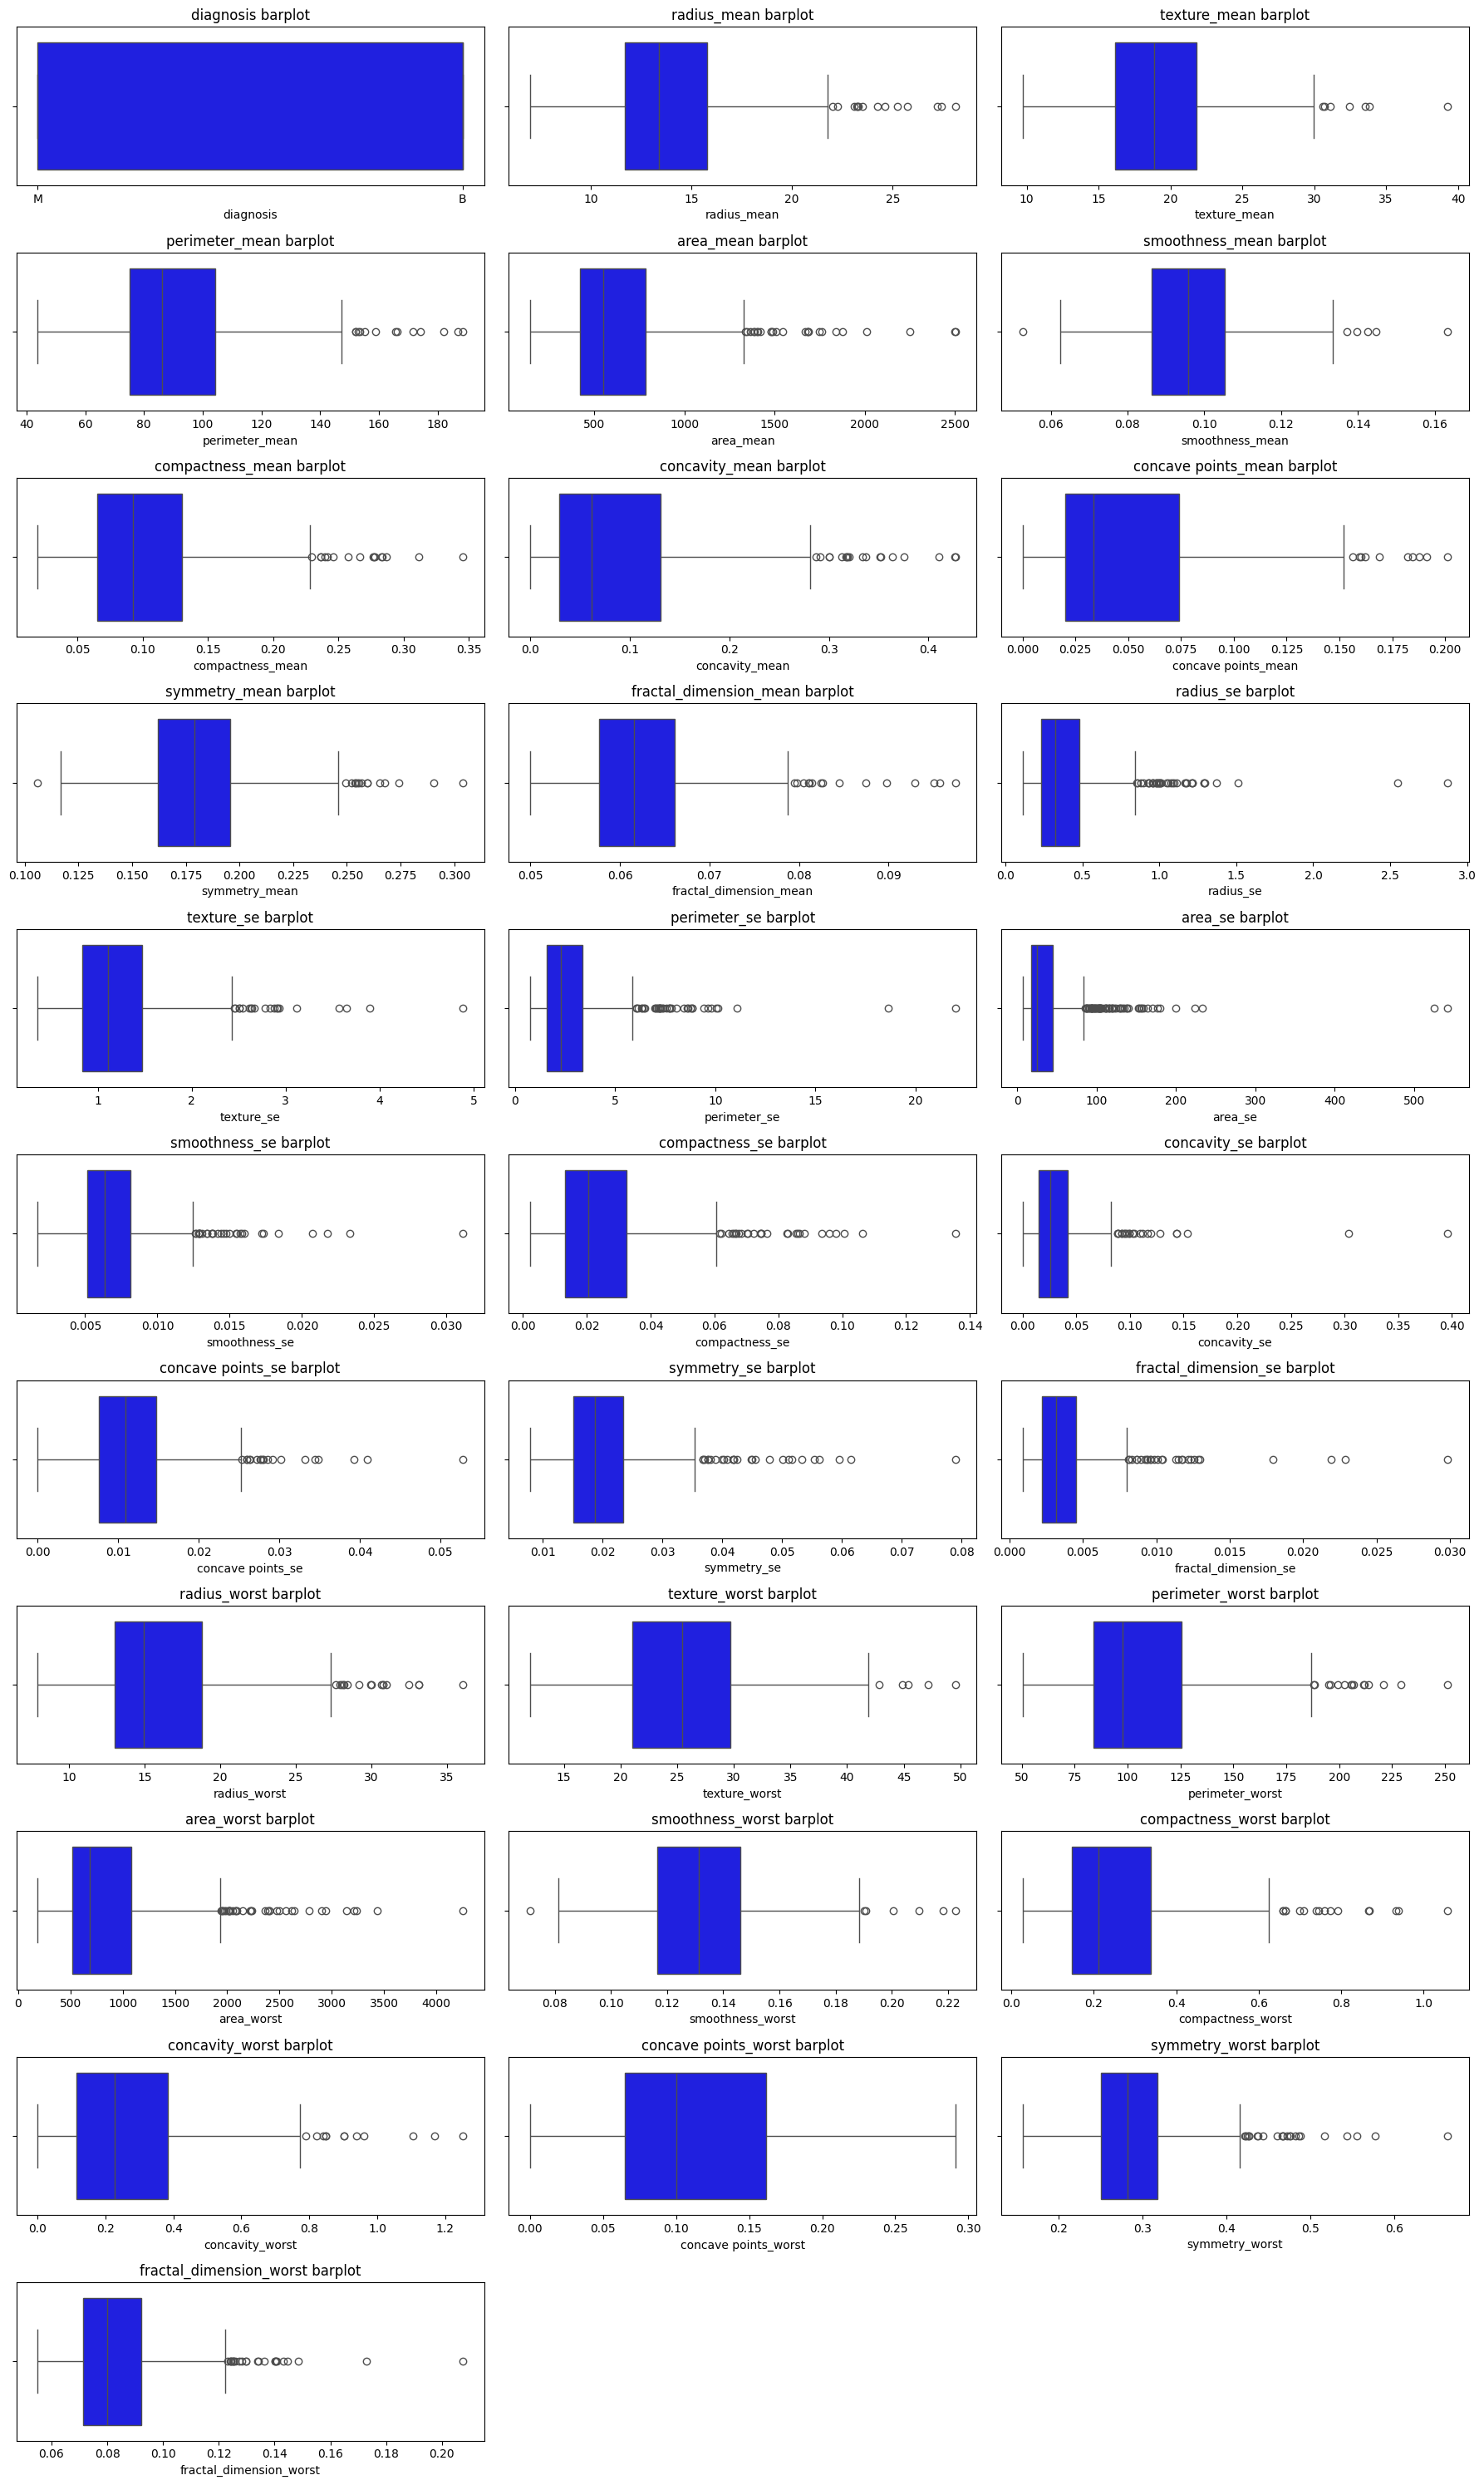

In [14]:
plt.figure(figsize=(18, 30))
for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x=bf, data=df,  color='blue')

    plt.title(f'{bf} barplot')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

y = df["diagnosis"].map({"M": 1, "B": 0}).values

# Drop diagnosis
X = df.drop(columns=["diagnosis"]).values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### Expirement 1 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix 

from src.clustering.kmeans import KMeans_Scratch
from src.dimensionality_reduction.pca import PCA
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch
)
from src.metrics.external import (
    adjusted_rand_index_scratch,
    normalized_mutual_information_scratch,
    purity_score_scratch
)

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))






# --- 4. FINAL METRICS & VISUALIZATION (Best Model) ---
best_labels = km_kpp.labels_

# Calculate External Metrics


# --- ADDED INTERNAL METRICS FOR FINAL MODEL ---
final_sil = silhouette_score_scratch(X_scaled, best_labels)
final_db = davies_bouldin_score_scratch(X_scaled, best_labels)
final_ch = calinski_harabasz_score_scratch(X_scaled, best_labels)

print(f"\nFinal Results (k={optimal_k}):")
print(f"ARI: {ari:.4f}")
print(f"NMI: {nmi:.4f}")
print(f"Purity: {purity:.4f}")
print("-" * 30)
print(f"Silhouette: {final_sil:.4f}")
print(f"Davies-Bouldin: {final_db:.4f}")
print(f"Calinski-Harabasz: {final_ch:.4f}") # <--- CRITICAL MISSING PIECE

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, best_labels))

# 2D Projection (Remains the same)
# ...

Running Analysis for k= from 2 to 10


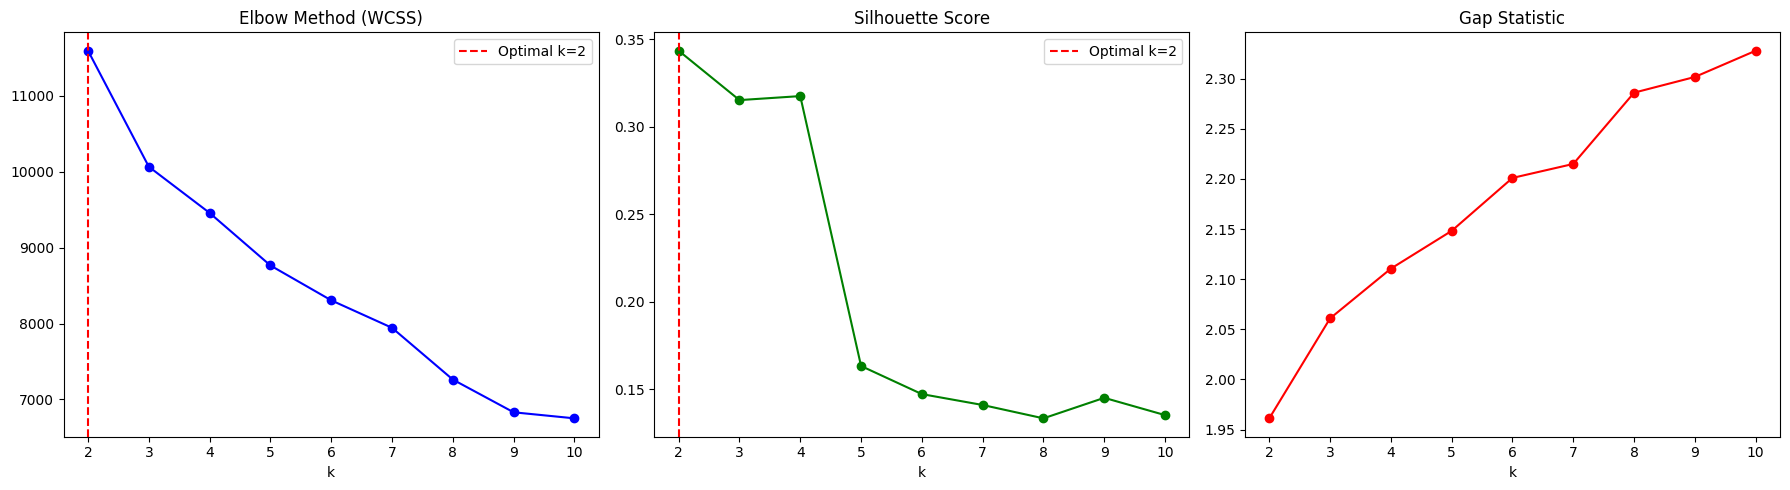


Comparing Initialization at k=2...
Random Init Iterations: 7
KMeans++ Init Iterations: 10


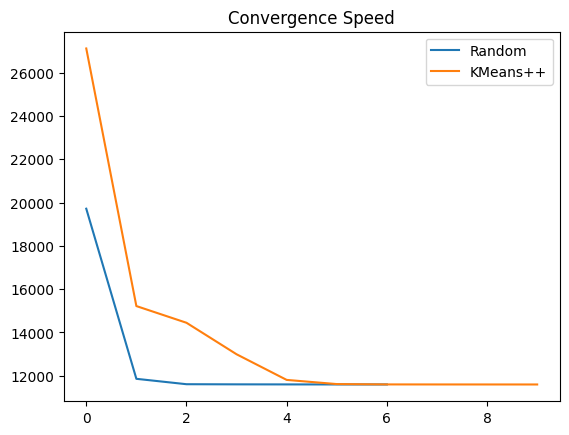


Final Results (k=2):
ARI: 0.6536
NMI: 0.5324
Purity: 0.9051
------------------------------
Silhouette: 0.3434
Davies-Bouldin: 1.3205
Calinski-Harabasz: 267.6917

Confusion Matrix:
[[339  18]
 [ 36 176]]


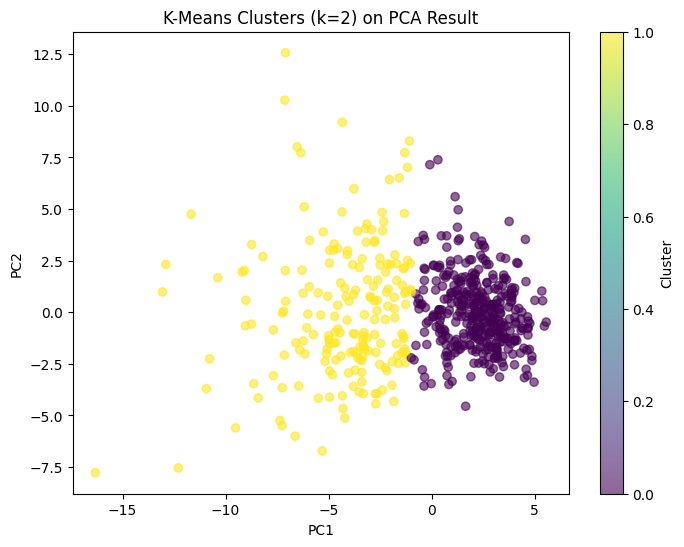

In [25]:


# --- 1. OPTIMAL K ANALYSIS (Elbow, Silhouette, Gap) ---
k_values = range(2, 11)
wcss_list = []
sil_scores = []
ch_scores = []
db_scores = []
gap_values = []

# Define Gap Statistic Function
def gap_statistic(X, k, B=5):
    # 1. Fit on Real Data
    model = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    model.fit(X)
    log_wcss_real = np.log(model.inertia_)

    # 2. Fit on Reference Data (Random Uniform)
    log_wcss_rands = []
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    
    for _ in range(B):
        X_rand = np.random.uniform(mins, maxs, size=X.shape)
        km_rand = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
        km_rand.fit(X_rand)
        log_wcss_rands.append(np.log(km_rand.inertia_))

    # Gap = E[log(W_ref)] - log(W_real)
    return np.mean(log_wcss_rands) - log_wcss_real

print("Running Analysis for k= from 2 to 10")
for k in k_values:
    # Train
    model = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    model.fit(X_scaled)
    labels = model.labels_
    
    # Store Metrics
    wcss_list.append(model.inertia_)
    sil_scores.append(silhouette_score_scratch(X_scaled, labels))
    db_scores.append(davies_bouldin_score_scratch(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score_scratch(X_scaled, labels))
    
    # Calculate Gap (This might be slow, so B=5 is good for testing)
    gap = gap_statistic(X_scaled, k, B=5)
    gap_values.append(gap)

# --- 2. PLOT RESULTS ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow
axes[0].plot(k_values, wcss_list, 'bo-')
axes[0].axvline(x=2, color='r', linestyle='--', label='Optimal k=2') # <--- ADDED MARKER
axes[0].set_title("Elbow Method (WCSS)")
axes[0].set_xlabel("k")
axes[0].legend()

# Silhouette
axes[1].plot(k_values, sil_scores, 'go-')
axes[1].axvline(x=2, color='r', linestyle='--', label='Optimal k=2') # <--- ADDED MARKER
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k")
axes[1].legend()

# Gap Statistic
axes[2].plot(k_values, gap_values, 'ro-')
axes[2].set_title("Gap Statistic")
axes[2].set_xlabel("k")

plt.tight_layout()
plt.show()



# --- 3. CONVERGENCE COMPARISON (at Fixed k=2) ---
optimal_k = 2 
print(f"\nComparing Initialization at k={optimal_k}...")

# Random
km_random = KMeans_Scratch(n_clusters=optimal_k, init_method="random")
km_random.fit(X_scaled)

# K-Means++
km_kpp = KMeans_Scratch(n_clusters=optimal_k, init_method="kmeans++")
km_kpp.fit(X_scaled)

print(f"Random Init Iterations: {len(km_random.inertia_history)}")
print(f"KMeans++ Init Iterations: {len(km_kpp.inertia_history)}")

plt.plot(km_random.inertia_history, label="Random")
plt.plot(km_kpp.inertia_history, label="KMeans++")
plt.title("Convergence Speed")
plt.legend()
plt.show()

#  EXTERNAL METRICS & VISUALIZATION (Best Model) ---
# Use the best model (KMeans++)
best_labels = km_kpp.labels_

# Calculate External Metrics
ari = adjusted_rand_index_scratch(y, best_labels)
nmi = normalized_mutual_information_scratch(y, best_labels)
purity = purity_score_scratch(y, best_labels)



final_sil = silhouette_score_scratch(X_scaled, best_labels)
final_db = davies_bouldin_score_scratch(X_scaled, best_labels)
final_ch = calinski_harabasz_score_scratch(X_scaled, best_labels)

print(f"\nFinal Results (k={optimal_k}):")
print(f"ARI: {ari:.4f}")
print(f"NMI: {nmi:.4f}")
print(f"Purity: {purity:.4f}")
print("-" * 30)
print(f"Silhouette: {final_sil:.4f}")
print(f"Davies-Bouldin: {final_db:.4f}")
print(f"Calinski-Harabasz: {final_ch:.4f}") 

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, best_labels))


# 2D Projection
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled) 

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clusters (k={optimal_k}) on PCA Result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

# Experiment 2: GMM on original data

=== Running Experiment 2: GMM Analysis ===
1. Finding Optimal Components (k=2..10)...


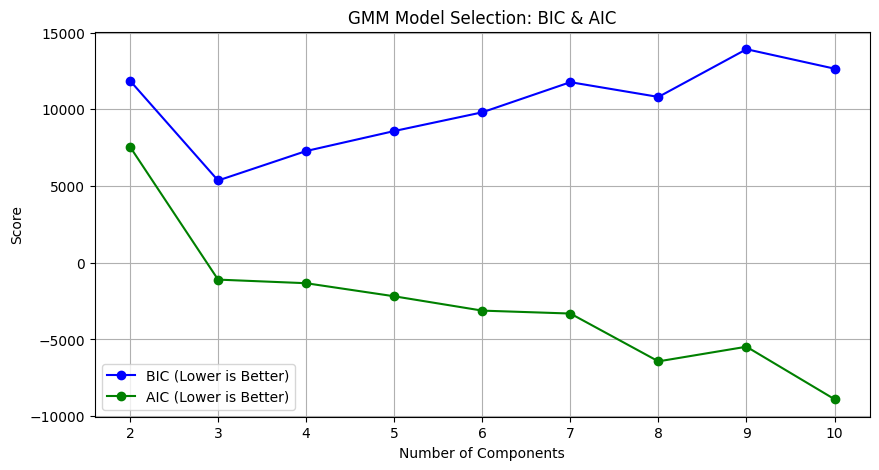

Optimal k based on BIC: 3

2. Comparing Covariance Types at k=2...
  Covariance Type  Log-Likelihood  Iterations  Time (s)
0            full      254.438851          45  0.031357
1            tied    -3960.403969          40  0.021443
2        diagonal   -18554.589709          13  0.003814
3       spherical   -20080.821221          15  0.003555


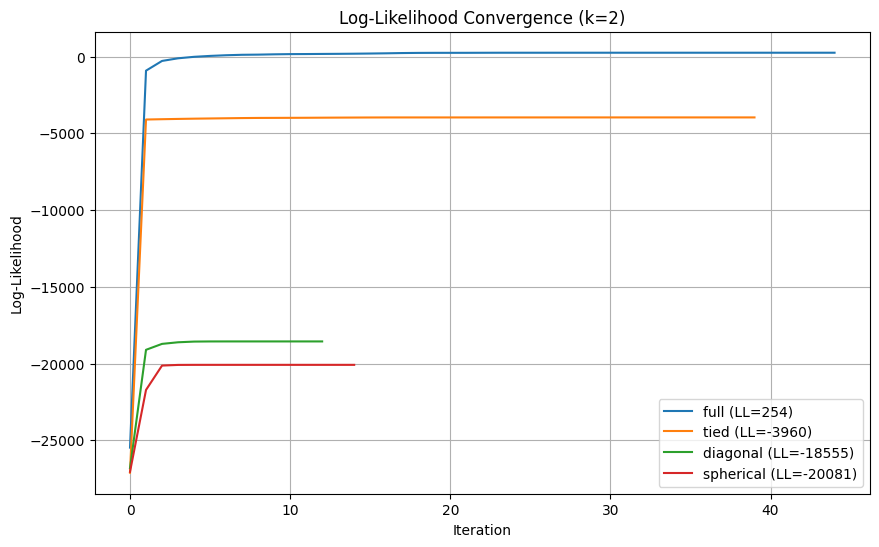


3. Evaluating Best GMM Model (full covariance)...
Final GMM Purity: 0.9174
Final GMM ARI:    0.6955
Final GMM NMI:    0.5783

Confusion Matrix:
[[ 29 328]
 [194  18]]

Internal Metrics for Best GMM (k=2):
Silhouette Score:      0.3076
Davies-Bouldin Index:  1.4187
Calinski-Harabasz:     236.1135
WCSS (Inertia):        12051.4786


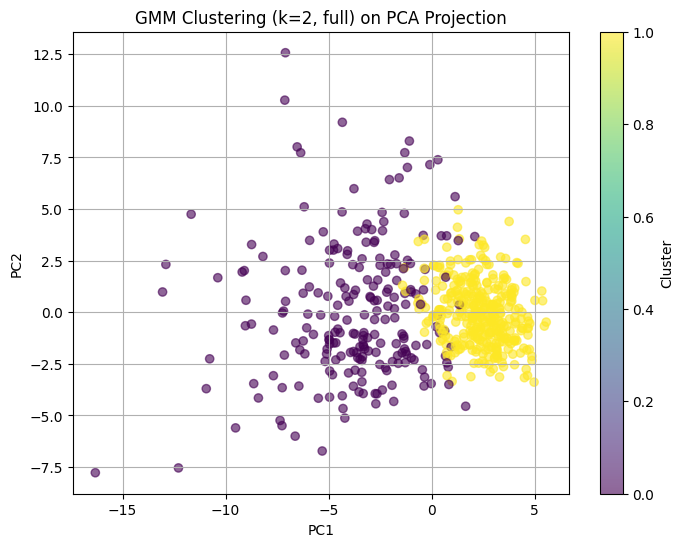

In [26]:
import time

from src.clustering.gmm import GMM_Scratch
from src.metrics.internal import calculate_gmm_metrics
from src.metrics.external import purity_score_scratch, adjusted_rand_index_scratch
from src.metrics.internal import calculate_wcss

# ==========================================
# PART 1: OPTIMAL COMPONENTS (BIC & AIC)
# ==========================================
print("=== Running Experiment 2: GMM Analysis ===")
print("1. Finding Optimal Components (k=2..10)...")

n_components_range = range(2, 11)
bic_scores = []
aic_scores = []
log_likelihoods = []

# We use 'full' covariance for finding k as it's the most flexible
for k in n_components_range:
    gmm = GMM_Scratch(n_components=k, max_iter=100, tol=1e-4, covariance_type='full')
    gmm.fit(X_scaled)
    
    final_ll = gmm.log_likelihood_history[-1]
    
    metrics = calculate_gmm_metrics(X_scaled, final_ll, k, 'full')
    
    bic_scores.append(metrics['BIC'])
    aic_scores.append(metrics['AIC'])
    log_likelihoods.append(final_ll)

# Plot BIC and AIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, 'bo-', label='BIC (Lower is Better)')
plt.plot(n_components_range, aic_scores, 'go-', label='AIC (Lower is Better)')
plt.title('GMM Model Selection: BIC & AIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Determine optimal k (lowest BIC)
optimal_k_gmm = n_components_range[np.argmin(bic_scores)]
print(f"Optimal k based on BIC: {optimal_k_gmm}")

# ==========================================
# PART 2: COMPARE COVARIANCE TYPES
# ==========================================
# We will use k=2 (Ground Truth) or optimal_k_gmm for fair comparison
cov_k = 2 
print(f"\n2. Comparing Covariance Types at k={cov_k}...")

cov_types = ['full', 'tied', 'diagonal', 'spherical']
results_list = []
best_gmm_model = None
best_ll = -np.inf

plt.figure(figsize=(10, 6))

for cov_type in cov_types:
    start_time = time.time()
    
    gmm = GMM_Scratch(n_components=cov_k, max_iter=200, tol=1e-4, covariance_type=cov_type)
    gmm.fit(X_scaled)
    
    elapsed = time.time() - start_time
    final_ll = gmm.log_likelihood_history[-1]
    iters = len(gmm.log_likelihood_history)
    
    # Store Best Model
    if final_ll > best_ll:
        best_ll = final_ll
        best_gmm_model = gmm
        best_cov_type = cov_type
        
    # Plot Convergence
    plt.plot(gmm.log_likelihood_history, label=f'{cov_type} (LL={final_ll:.0f})')
    
    results_list.append({
        'Covariance Type': cov_type,
        'Log-Likelihood': final_ll,
        'Iterations': iters,
        'Time (s)': elapsed
    })

# Show Comparison Table
results_df = pd.DataFrame(results_list)
print(results_df)

# Show Convergence Plot
plt.title(f'Log-Likelihood Convergence (k={cov_k})')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

# ==========================================
# PART 3: FINAL METRICS (BEST GMM)
# ==========================================
print(f"\n3. Evaluating Best GMM Model ({best_cov_type} covariance)...")

# Predict labels
y_pred_gmm = best_gmm_model.predict(X_scaled)

# External Validation
purity = purity_score_scratch(y, y_pred_gmm)
ari = adjusted_rand_index_scratch(y, y_pred_gmm)
nmi = normalized_mutual_information_scratch(y, y_pred_gmm)

print(f"Final GMM Purity: {purity:.4f}")
print(f"Final GMM ARI:    {ari:.4f}")
print(f"Final GMM NMI:    {nmi:.4f}")

# Optional: Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_gmm))






# ... (Previous Experiment 2 code ending at Confusion Matrix) ...

# ==========================================
# PART 4: MISSING METRICS & VISUALIZATION
# ==========================================
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch
)
from src.dimensionality_reduction.pca import PCA # For visualization only

# 1. Calculate Generic Internal Metrics for GMM
# Note: We use the labels predicted by GMM
sil_gmm = silhouette_score_scratch(X_scaled, y_pred_gmm)
db_gmm = davies_bouldin_score_scratch(X_scaled, y_pred_gmm)
ch_gmm = calinski_harabasz_score_scratch(X_scaled, y_pred_gmm)
wcss_gmm = calculate_wcss(X_scaled, y_pred_gmm, best_gmm_model.means)

print(f"\nInternal Metrics for Best GMM (k={cov_k}):")
print(f"Silhouette Score:      {sil_gmm:.4f}")
print(f"Davies-Bouldin Index:  {db_gmm:.4f}")
print(f"Calinski-Harabasz:     {ch_gmm:.4f}")
print(f"WCSS (Inertia):        {wcss_gmm:.4f}")

# 2. GMM Cluster Visualization (2D Projection)
# We use PCA just to project the 30 features down to 2 so we can see the clusters
pca_viz = PCA(n_components=2)
X_2d_gmm = pca_viz.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_gmm[:, 0], X_2d_gmm[:, 1], c=y_pred_gmm, cmap='viridis', alpha=0.6)
plt.title(f'GMM Clustering (k={cov_k}, {best_cov_type}) on PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Experiment 4: GMM after PCA

=== Running Experiment 4: GMM after PCA ===


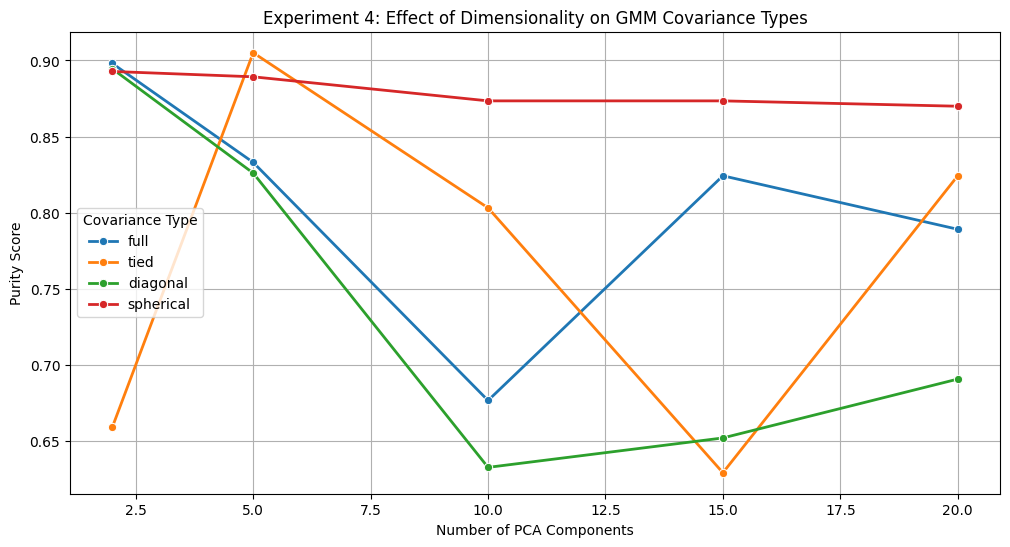


Purity Scores by Dimension and Covariance Type:
n_components           2         5         10        15        20
Covariance Type                                                  
diagonal         0.894552  0.826011  0.632689  0.652021  0.690685
full             0.898067  0.833040  0.676626  0.824253  0.789104
spherical        0.892794  0.889279  0.873462  0.873462  0.869947
tied             0.659051  0.905097  0.803163  0.629174  0.824253

=== Best Configuration: PCA=5, Covariance=tied ===
n_components                    5
Covariance Type              tied
Purity                   0.905097
ARI                      0.651478
NMI                      0.606401
Silhouette               0.390754
Davies-Bouldin           1.120598
Calinski-Harabasz      316.891112
WCSS                   9282.24425
Log-Likelihood       -5830.311578
BIC                  11825.564047
AIC                  11712.623155
Name: 5, dtype: object

Confusion Matrix for Best Model:
[[357   0]
 [ 54 158]]


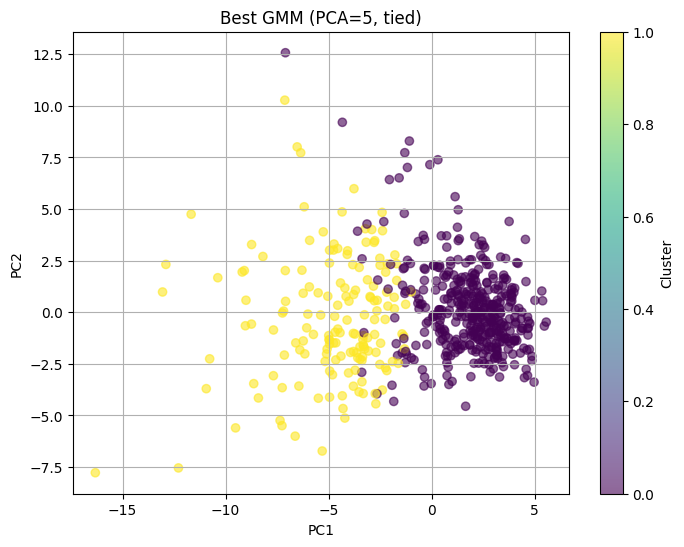

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Imports
from src.dimensionality_reduction.pca import PCA
from src.clustering.gmm import GMM_Scratch
from src.metrics.external import (
    purity_score_scratch, 
    adjusted_rand_index_scratch, 
    normalized_mutual_information_scratch
)
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch,
    calculate_gmm_metrics,
    calculate_wcss
)

print("=== Running Experiment 4: GMM after PCA ===")

# Settings
n_components_list = [2, 5, 10, 15, 20]
cov_types = ['full', 'tied', 'diagonal', 'spherical']
results_exp4 = []

gmm_k = 2
best_exp4_config = None
best_exp4_purity = -1
best_model_instance = None
best_X_reduced = None

# --- Main Experiment Loop ---
for n_comp in n_components_list:
    # 1. Apply PCA
    pca = PCA(n_components=n_comp)
    X_reduced = pca.fit_transform(X_scaled)
    
    for cov_type in cov_types:
        # Train GMM
        gmm = GMM_Scratch(n_components=gmm_k, max_iter=100, tol=1e-4, covariance_type=cov_type)
        gmm.fit(X_reduced)
        
        # Predict
        y_pred = gmm.predict(X_reduced)
        final_ll = gmm.log_likelihood_history[-1]
        
        # --- CALCULATE METRICS ---
        # 1. External
        purity = purity_score_scratch(y, y_pred)
        ari = adjusted_rand_index_scratch(y, y_pred)
        nmi = normalized_mutual_information_scratch(y, y_pred) # <--- ADDED
        
        # 2. Internal
        sil = silhouette_score_scratch(X_reduced, y_pred)
        db = davies_bouldin_score_scratch(X_reduced, y_pred)
        ch = calinski_harabasz_score_scratch(X_reduced, y_pred)
        
        # 3. GMM Specific (BIC/AIC) & WCSS
        gmm_metrics = calculate_gmm_metrics(X_reduced, final_ll, gmm_k, cov_type)
        wcss = calculate_wcss(X_reduced, y_pred, gmm.means)
        
        # Save Best Model Logic
        if purity > best_exp4_purity:
            best_exp4_purity = purity
            best_exp4_config = (n_comp, cov_type)
            best_model_instance = gmm # Save for confusion matrix later
            best_X_reduced = X_reduced # Save for plotting
            best_labels = y_pred

        results_exp4.append({
            'n_components': n_comp,
            'Covariance Type': cov_type,
            'Purity': purity,
            'ARI': ari,
            'NMI': nmi,
            'Silhouette': sil,
            'Davies-Bouldin': db,
            'Calinski-Harabasz': ch,
            'WCSS': wcss,
            'Log-Likelihood': final_ll,
            'BIC': gmm_metrics['BIC'],
            'AIC': gmm_metrics['AIC']
        })

# --- ANALYSIS & VISUALIZATION ---
df_exp4 = pd.DataFrame(results_exp4)

# 1. Line Plot (Experiment 4 Specific Goal)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_exp4, x='n_components', y='Purity', hue='Covariance Type', marker='o', linewidth=2)
plt.title('Experiment 4: Effect of Dimensionality on GMM Covariance Types')
plt.xlabel('Number of PCA Components')
plt.ylabel('Purity Score')
plt.grid(True)
plt.legend(title='Covariance Type')
plt.show()

# 2. Pivot Table
print("\nPurity Scores by Dimension and Covariance Type:")
pivot_table = df_exp4.pivot(index='Covariance Type', columns='n_components', values='Purity')
print(pivot_table)

# --- BEST MODEL REPORTING (Required "For each experiment") ---
print(f"\n=== Best Configuration: PCA={best_exp4_config[0]}, Covariance={best_exp4_config[1]} ===")
best_row = df_exp4.loc[(df_exp4['n_components'] == best_exp4_config[0]) & 
                       (df_exp4['Covariance Type'] == best_exp4_config[1])].iloc[0]
print(best_row)

# 3. Confusion Matrix
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y, best_labels))

# 4. 2D Projection of Best Result
# If dimensions > 2, project to 2D for visualization
if best_exp4_config[0] > 2:
    pca_viz = PCA(n_components=2)
    X_viz = pca_viz.fit_transform(best_X_reduced)
else:
    X_viz = best_X_reduced

plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f'Best GMM (PCA={best_exp4_config[0]}, {best_exp4_config[1]})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Experiment 6: GMM after Autoencoder

In [44]:
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(float)  # 1 where z > 0, else 0 

def sigmoid(z): return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
def sigmoid_deriv(z): 
    s = sigmoid(z)
    return s * (1 - s)
def linear(z): return z
def linear_deriv(z): return np.ones_like(z)

def tanh(z): return np.tanh(z)
def tanh_deriv(z): return 1 - np.tanh(z)**2

=== Running Experiment 6: GMM after Autoencoder ===

Processing Bottleneck Dim: 2...

Processing Bottleneck Dim: 5...

Processing Bottleneck Dim: 10...

Processing Bottleneck Dim: 15...

Processing Bottleneck Dim: 20...


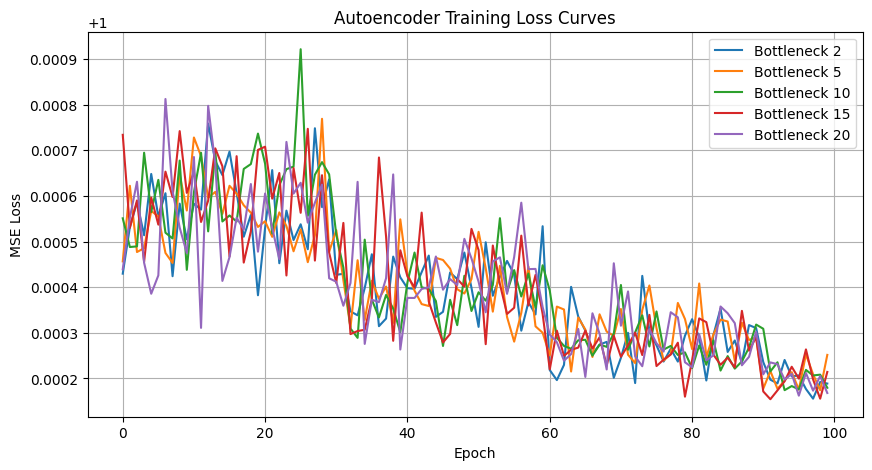

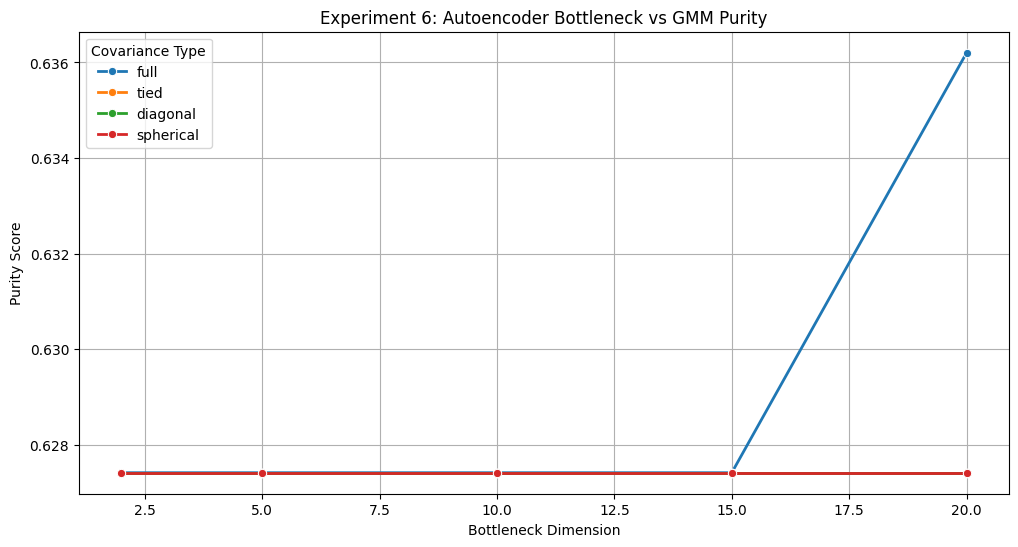


=== Best Exp 6 Config: Dim=20, Cov=full ===
Latent Dim                       20
Covariance Type                full
Purity                     0.636204
ARI                        0.012239
NMI                        0.024601
Silhouette                 0.678301
Davies-Bouldin             0.678853
Calinski-Harabasz         74.428995
WCSS                       0.000176
Reconstruction MSE         1.000168
Log-Likelihood         67989.874155
BIC                  -133055.219431
AIC                  -135057.748311
Name: 16, dtype: object

Confusion Matrix for Best Model:
[[  0 357]
 [  5 207]]


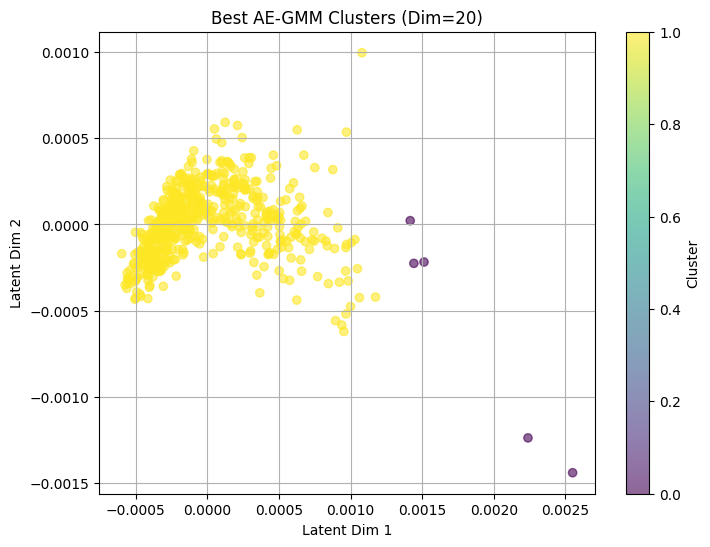


Purity Scores by Dimension and Covariance Type:
Latent Dim             2         5         10        15        20
Covariance Type                                                  
diagonal         0.627417  0.627417  0.627417  0.627417  0.627417
full             0.627417  0.627417  0.627417  0.627417  0.636204
spherical        0.627417  0.627417  0.627417  0.627417  0.627417
tied             0.627417  0.627417  0.627417  0.627417  0.627417


In [46]:
from src.dimensionality_reduction.autoencoder import AutoEncoder


# Imports (Ensure these are loaded)
from src.clustering.gmm import GMM_Scratch
from src.dimensionality_reduction.pca import PCA # For visualization only
from src.metrics.external import (
    purity_score_scratch, 
    adjusted_rand_index_scratch, 
    normalized_mutual_information_scratch
)
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch,
    calculate_gmm_metrics,
    calculate_wcss
)

print("=== Running Experiment 6: GMM after Autoencoder ===")

# --- 1. Settings from Exp 5 ---
bottleneck_dims = [2, 5, 10, 15, 20]
input_dim = X_scaled.shape[1]
gmm_k = 2  # Malignant vs Benign
cov_types = ['full', 'tied', 'diagonal', 'spherical']

results_exp6 = []
loss_histories = {}

# Variables to store the best result for final visualization
best_exp6_purity = -1
best_exp6_config = None
best_labels = None
best_X_encoded = None

# --- 2. Main Loop Over Bottleneck Dimensions ---
for b_dim in bottleneck_dims:
    print(f"\nProcessing Bottleneck Dim: {b_dim}...")

    # A. Define Architecture (Matches your Exp 5)
    # Input -> 64 -> 32 -> Bottleneck -> 32 -> 64 -> Input
    layers = [input_dim, 64, 32, b_dim, 32, 64, input_dim]
    
    # Activations (Matches your Exp 5)
    activations = [
        (tanh, tanh_deriv),      # Layer 0: Input -> 64
        (relu, relu_deriv),      # Layer 1: 64 -> 32
        (relu, relu_deriv),      # Layer 2: 32 -> Bottleneck (Latent)
        (relu, relu_deriv),      # Layer 3: Bottleneck -> 32
        (tanh, tanh_deriv),      # Layer 4: 32 -> 64
        (linear, linear_deriv)
    ]

    # B. Train Autoencoder
    ae = AutoEncoder(layers, activations, lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=100, batch_size=32, step_size=30, gamma=0.7)
    
    loss_histories[b_dim] = ae.losses
    final_loss = ae.losses[-1]

    # C. Extract Latent Features (Manual Forward Pass to Bottleneck)
    # We need to pass data through the first 3 layers (Indices 0, 1, 2)
    
    # Layer 0 (Input -> 64)
    Z0 = X_scaled @ ae.W[0] + ae.b[0]
    A0 = activations[0][0](Z0)
    
    # Layer 1 (64 -> 32)
    Z1 = A0 @ ae.W[1] + ae.b[1]
    A1 = activations[1][0](Z1)
    
    # Layer 2 (32 -> Bottleneck)
    Z2 = A1 @ ae.W[2] + ae.b[2]
    X_encoded = activations[2][0](Z2) # This is our Latent Representation
    
    # D. Train GMM on Latent Features
    for cov_type in cov_types:
        # Train
        gmm = GMM_Scratch(n_components=gmm_k, max_iter=100, tol=1e-4, covariance_type=cov_type)
        gmm.fit(X_encoded)
        y_pred = gmm.predict(X_encoded)
        final_ll = gmm.log_likelihood_history[-1]
        
        # --- Calculate All Metrics ---
        # 1. External
        purity = purity_score_scratch(y, y_pred)
        ari = adjusted_rand_index_scratch(y, y_pred)
        nmi = normalized_mutual_information_scratch(y, y_pred)
        
        # 2. Internal
        sil = silhouette_score_scratch(X_encoded, y_pred)
        db = davies_bouldin_score_scratch(X_encoded, y_pred)
        ch = calinski_harabasz_score_scratch(X_encoded, y_pred)
        
        # 3. GMM Specific (BIC/AIC) & WCSS
        gmm_metrics = calculate_gmm_metrics(X_encoded, final_ll, gmm_k, cov_type)
        wcss = calculate_wcss(X_encoded, y_pred, gmm.means)
        
        # Check for Best Model
        if purity > best_exp6_purity:
            best_exp6_purity = purity
            best_exp6_config = (b_dim, cov_type)
            best_labels = y_pred
            best_X_encoded = X_encoded

        results_exp6.append({
            'Latent Dim': b_dim,
            'Covariance Type': cov_type,
            'Purity': purity,
            'ARI': ari,
            'NMI': nmi,
            'Silhouette': sil,
            'Davies-Bouldin': db,
            'Calinski-Harabasz': ch,
            'WCSS': wcss,
            'Reconstruction MSE': final_loss,
            'Log-Likelihood': final_ll,
            'BIC': gmm_metrics['BIC'],
            'AIC': gmm_metrics['AIC']
        })

# --- 3. ANALYSIS & VISUALIZATION ---
df_exp6 = pd.DataFrame(results_exp6)

# 1. Training Loss Curves
plt.figure(figsize=(10, 5))
for dim in bottleneck_dims:
    plt.plot(loss_histories[dim], label=f'Bottleneck {dim}')
plt.title('Autoencoder Training Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Purity Comparison (Dim vs Covariance Type)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_exp6, x='Latent Dim', y='Purity', hue='Covariance Type', marker='o', linewidth=2)
plt.title('Experiment 6: Autoencoder Bottleneck vs GMM Purity')
plt.xlabel('Bottleneck Dimension')
plt.ylabel('Purity Score')
plt.grid(True)
plt.show()

# 3. Report Best Configuration
print(f"\n=== Best Exp 6 Config: Dim={best_exp6_config[0]}, Cov={best_exp6_config[1]} ===")
best_row = df_exp6.loc[(df_exp6['Latent Dim'] == best_exp6_config[0]) & 
                       (df_exp6['Covariance Type'] == best_exp6_config[1])].iloc[0]
print(best_row)

# 4. Confusion Matrix (Best Model)
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y, best_labels))

# 5. 2D Projection of Best Latent Space 
# If latent dim > 2, we use PCA to project to 2D for visualization
if best_exp6_config[0] > 2:
    pca_viz = PCA(n_components=2)
    X_viz = pca_viz.fit_transform(best_X_encoded)
else:
    X_viz = best_X_encoded

plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f'Best AE-GMM Clusters (Dim={best_exp6_config[0]})')
plt.xlabel('Latent Dim 1')
plt.ylabel('Latent Dim 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# 6. Detailed Pivot Table
print("\nPurity Scores by Dimension and Covariance Type:")
print(df_exp6.pivot(index='Covariance Type', columns='Latent Dim', values='Purity'))